# Linear Regression : Predicting Diabetes Progression

---

## Import software libraries 

In [9]:
import sys  # Read system parameters.

import matplotlib as mpl  # Create 2D charts.
import matplotlib.cm as cm  # Builtin colormaps, colormap handling utilities,
import matplotlib.pyplot as plt  # Plotting
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data.
import seaborn as sb  # Perform data visualization.
import sklearn  # Perform data mining and analysis.
from sklearn import (
    datasets,  # Utilities to load popular datasets and artificial data generators.
)

# Summarize software libraries used.
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- Seaborn {}".format(sb.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.8.18 | packaged by conda-forge | (default, Dec 23 2023, 17:23:49) 
[Clang 15.0.7 ]
- NumPy 1.24.3
- pandas 2.0.3
- Matplotlib 3.7.2
- Seaborn 0.13.2
- scikit-learn 1.3.2



## Load Dataset

In [10]:
# Load the dataset.
diabetes = datasets.load_diabetes()
print("Loaded {} records.".format(len(diabetes.data)))

Loaded 442 records.


## Convert Dataset to DataFrame

In [11]:
# Convert array to pandas DataFrame.
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

## Get Acquainted with the Dataset

In [12]:
# View data types and see if there are missing entries.
print("Data types and missing values:\n")
print(diabetes_df.info())

Data types and missing values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


### Add 'target' column 

In [ ]:
diabetes_df["target"] = diabetes.target

### Review data to confirm 'target' added

In [14]:
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


## Examine the Distribution of Various Features

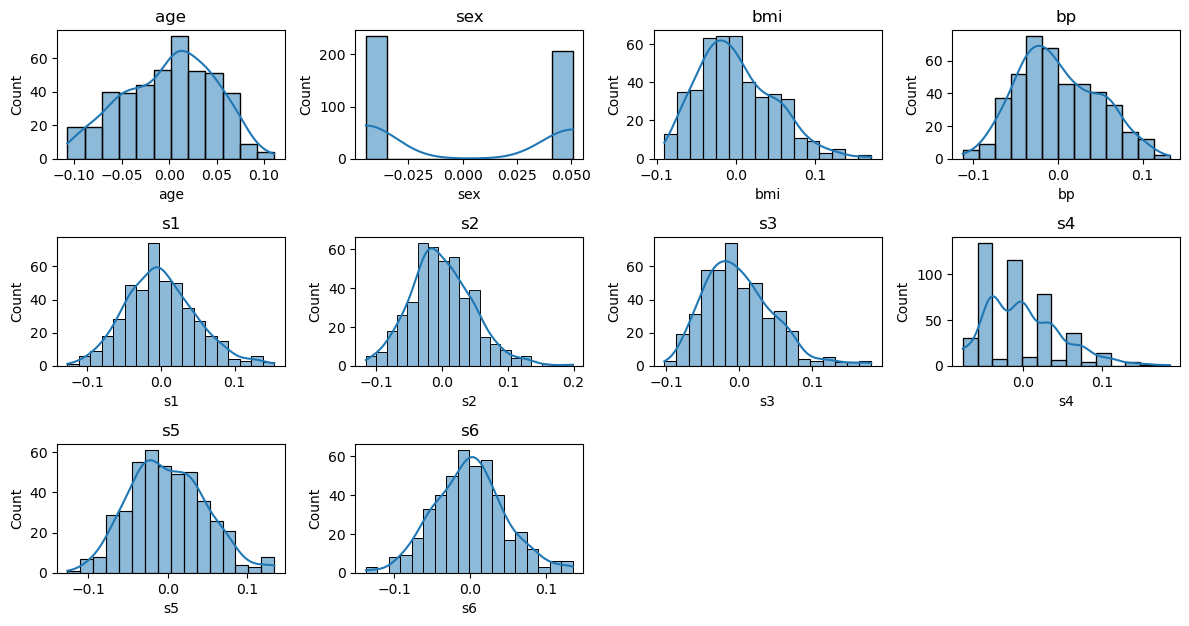

In [22]:
# Use Matplotlib to plot distribution histograms for all features.
plt.figure(figsize=(12, 8))
for i, feature in enumerate(diabetes.feature_names):
    plt.subplot(4, 4, i + 1)
    sb.histplot(diabetes_df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## Examine a General Summary of Statistics

In [23]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
print("Summary statistics for each feature:\n")
print(diabetes_df.describe())

Summary statistics for each feature:

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.7619

## Search Dataset for Columns that Correlate with 'target'

In [24]:
# View the correlation values for each feature compared to the label.
correlation_matrix = diabetes_df.corr()
print("Correlation with target (disease progression):\n")
print(correlation_matrix)

Correlation with target (disease progression):

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.39

## Split the Label From the Dataset

In [25]:
# Split the training and test datasets and their labels.
X = diabetes_df.drop("target", axis=1)
y = diabetes.target

## Compare Shape of Original Dataset to Training and Test Sets.

In [26]:
# Compare the number of rows and columns in the original data to the training and test sets.
print("Original data shape:", diabetes_df.shape)
print("X shape (features):", X.shape)
print("y shape (target):", y.shape)

Original data shape: (442, 11)
X shape (features): (442, 10)
y shape (target): (442,)


## Drop the Least Correlated Columns to Target

In [27]:
# Drop the three features that have the least correlation with the label.
columns_to_drop = ["s1", "s2", "s3"]
X = X.drop(columns_to_drop, axis=1)

print("New X shape after dropping columns:", X.shape)

New X shape after dropping columns: (442, 7)


## Create a Linear Regression Model

In [34]:
# Construct a basic linear regression class object.
from sklearn.linear_model import LinearRegression

# Fit the training data to the regression object.
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

## Test Set Predictions

In [29]:
# Make predictions on the test set.
predictions = regressor.predict(X.head(10))

## Compare Predicitions to Actual Disease Progression

In [35]:
# View examples of the predictions compared to actual disease progression.
print("Comparison of first ten predictions to actual values:")
for i in range(10):
    print("Prediction: {:.2f} \t Actual: {}".format(predictions[i], y[i]))

Comparison of first ten predictions to actual values:
Prediction: 191.21 	 Actual: 151.0
Prediction: 80.26 	 Actual: 75.0
Prediction: 162.43 	 Actual: 141.0
Prediction: 161.04 	 Actual: 206.0
Prediction: 127.89 	 Actual: 135.0
Prediction: 100.07 	 Actual: 97.0
Prediction: 76.69 	 Actual: 138.0
Prediction: 145.52 	 Actual: 63.0
Prediction: 157.10 	 Actual: 110.0
Prediction: 205.83 	 Actual: 310.0


## Calculate Error Between Predicted and Actual Values

### MSE

In [36]:
# Print the mean squared error (MSE) for the model's predictions on the test set.
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 3011.2166142874676


### RSME

In [42]:
# Print the root mean squared error (RMSE) for the model's predictions on the test set.
import math

rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 54.87455343132614


## Plot Lines of Best Fit for Four Features

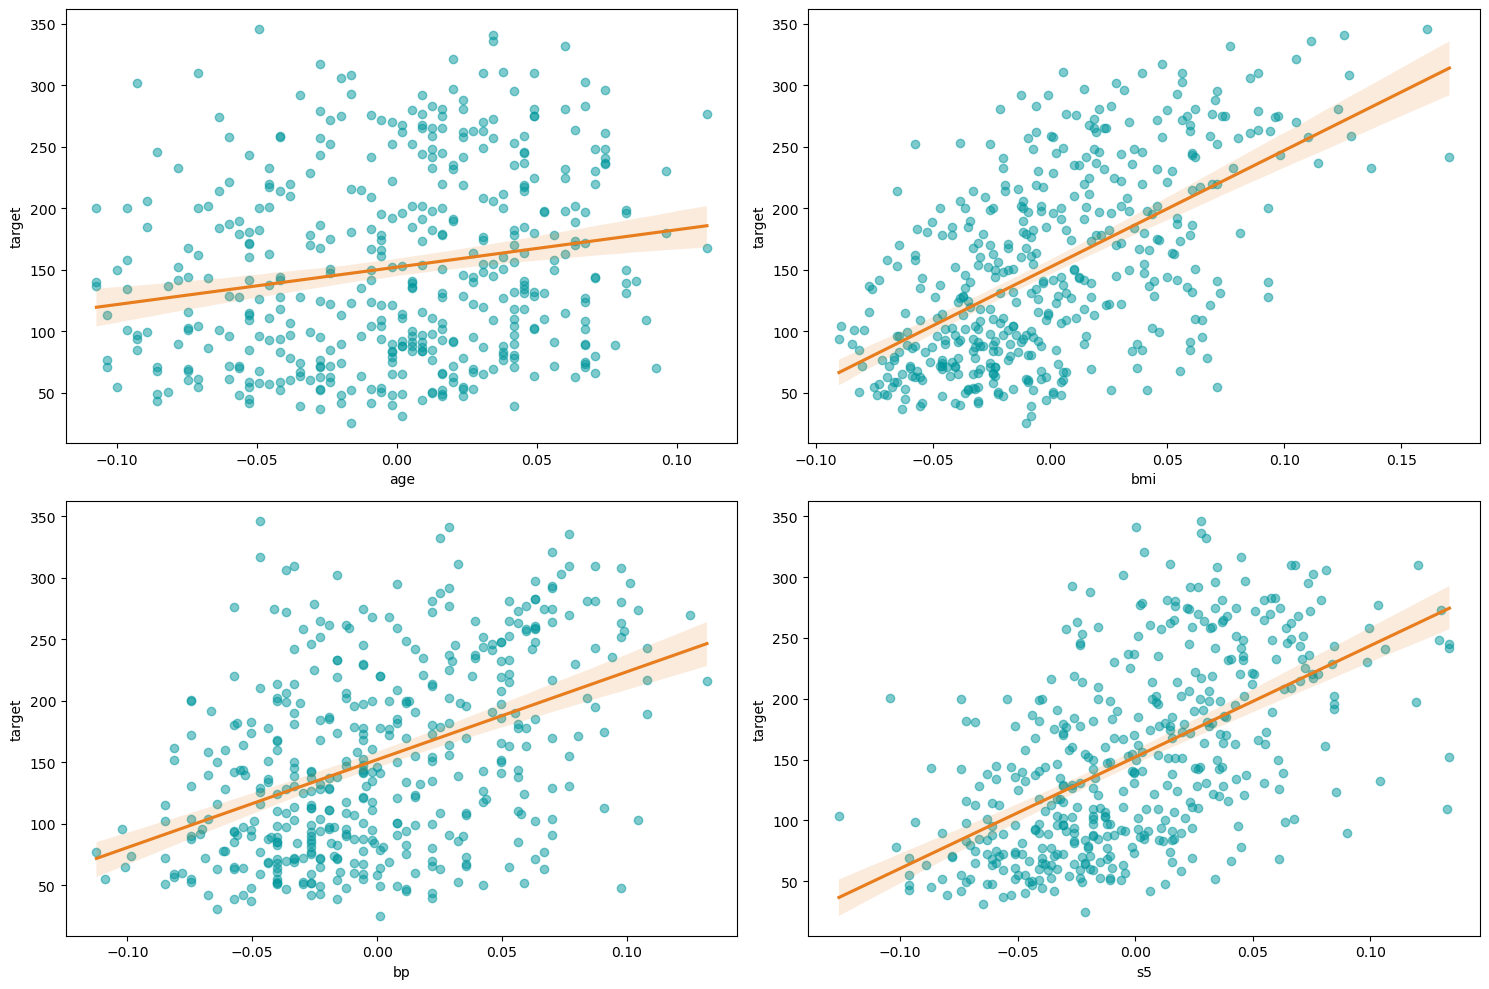

In [53]:
# Use Seaborn to create subplots for the four features that have the strongest correlation with the label.
# Also plot a line of best fit for each feature.
features_of_interest = ["age", "bmi", "bp", "s5"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_of_interest):
    plt.subplot(2, 2, i + 1)
    sb.regplot(
        x=feature,
        y="target",
        data=diabetes_df,
        scatter_kws={"alpha": 0.5},
        color="#00979D",
        line_kws=dict(color="#e87d1e"),
    )
plt.tight_layout()
plt.show()